# Física Nuclear y de Partículas #

## Tema 2. La interacción nuclear.  ##


César Fernández Ramírez\
Departamento de Física Interdisciplinar\
Universidad Nacional de Eduación a Distancia

Versión: Junio 2024

Contenidos:

- 



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cm
import pandas as pd

jpac_blue   = "#1F77B4"; jpac_red    = "#D61D28";
jpac_green  = "#2CA02C"; jpac_orange = "#FF7F0E";
jpac_purple = "#9467BD"; jpac_brown  = "#8C564B";
jpac_pink   = "#E377C2"; jpac_gold   = "#BCBD22";
jpac_aqua   = "#17BECF"; jpac_grey   = "#7F7F7F";

jpac_color = [jpac_blue, jpac_red, jpac_green, 
              jpac_orange, jpac_purple, jpac_brown,
              jpac_pink, jpac_gold, jpac_aqua, jpac_grey, 'black' ];

jpac_axes = jpac_color[10]
dashes = 40*'-'

# the service URL
livechart = "https://nds.iaea.org/relnsd/v1/data?"

# There have been cases in which the service returns an HTTP Error 403: Forbidden
# use this workaround
import urllib.request
def lc_pd_dataframe(url):
    req = urllib.request.Request(url)
    req.add_header('User-Agent', 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:77.0) Gecko/20100101 Firefox/77.0')
    return pd.read_csv(urllib.request.urlopen(req))


In [2]:
df = lc_pd_dataframe(livechart + "fields=ground_states&nuclides=all")
df = df[pd.to_numeric(df['binding'],errors='coerce').notna()]
df['binding'] /= 1000

dfparpar = df.loc[ ((df['z']%2==0) & (df['n']%2==0))]
dfimparimpar = df.loc[ ((df['z']%2!=0) & (df['n']%2!=0))]
dfparimpar = df.loc[ ((df['z']%2==0) & (df['n']%2!=0))]
dfimparpar = df.loc[ ((df['z']%2!=0) & (df['n']%2==0))]

print(' '); print(dashes); print('IAEA NDS'); print(dashes);
print('Número de núcleos en la base de datos:',df['n'].count())
print('Par-Par ',dfparpar['z'].count())
print('Par-Impar ',dfparimpar['z'].count())
print('Impar-Par ',dfimparpar['z'].count())
print('Impar-Impar ',dfimparimpar['z'].count())
total = dfparpar['z'].count()+ dfimparimpar['z'].count() +dfparimpar['z'].count()+dfimparpar['z'].count() 
print('Total núcleos', total )

df00 = df.loc[(df['half_life']=='STABLE' )]
dfparpar = df00.loc[ ((df00['z']%2==0) & (df00['n']%2==0))]
dfimparimpar = df00.loc[ ((df00['z']%2!=0) & (df00['n']%2!=0))]
dfparimpar = df00.loc[ ((df00['z']%2==0) & (df00['n']%2!=0))]
dfimparpar = df00.loc[ ((df00['z']%2!=0) & (df00['n']%2==0))]

print(dashes)
print('Núcleos estables')
total = dfparpar['z'].count()+ dfimparimpar['z'].count() +dfparimpar['z'].count()+dfimparpar['z'].count() 
print('Total núcleos estables', total )
print('Par-Par ',dfparpar['z'].count())
print('Par-Impar ',dfparimpar['z'].count())
print('Impar-Par ',dfimparpar['z'].count())
print('Impar-Impar ',dfimparimpar['z'].count())



 
----------------------------------------
IAEA NDS
----------------------------------------
Número de núcleos en la base de datos: 3357
Par-Par  847
Par-Impar  855
Impar-Par  818
Impar-Impar  837
Total núcleos 3357
----------------------------------------
Núcleos estables
Total núcleos estables 244
Par-Par  140
Par-Impar  52
Impar-Par  48
Impar-Impar  4


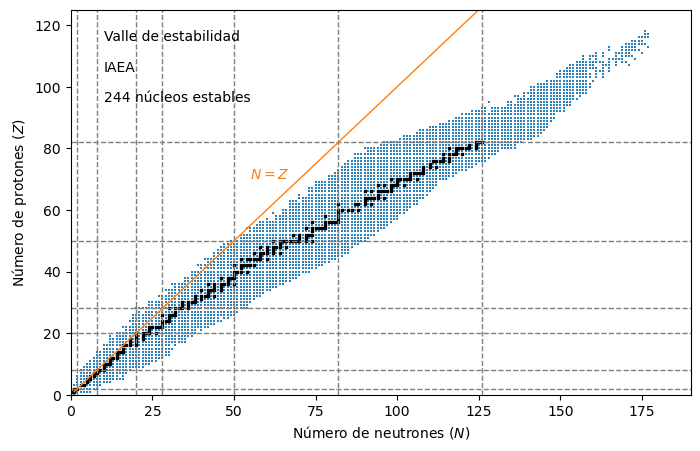

In [3]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,5)) 
ax.set_xlabel(r'Número de neutrones ($N$)')
ax.set_ylabel(r'Número de protones ($Z$)')
dfa1 = df.loc[(df['binding'] >= 6)]
dfa2 = df.loc[(df['binding'] < 6)]
ax.set_xlim((0,190))
ax.set_ylim((0,125))
plt.hlines( [2,8,20,28,50,82,126], 0, 190,colors=jpac_color[9], lw=1., linestyles='dashed')
plt.vlines( [2,8,20,28,50,82,126], 0, 125,colors=jpac_color[9], lw=1., linestyles='dashed')
x = np.linspace(1,125,125)
ax.plot(x,x,'-',lw=1,color=jpac_color[3])
ax.text(10,115,r'Valle de estabilidad',c=jpac_color[10],fontsize=10)
ax.text(10,105,r'IAEA',c=jpac_color[10],fontsize=10)
texto = str(df00['n'].count()) + ' núcleos estables'
ax.text(10,95,texto,c=jpac_color[10],fontsize=10)
ax.text(55,70,r'$N=Z$',c=jpac_color[3],fontsize=10)
ax.scatter(df['n'],df['z'],marker='s',s=2, c=jpac_color[0],edgecolors='white',lw=0.05)
ax.scatter(df00['n'],df00['z'],marker='s',s=2, c=jpac_color[10])
plt.show() 


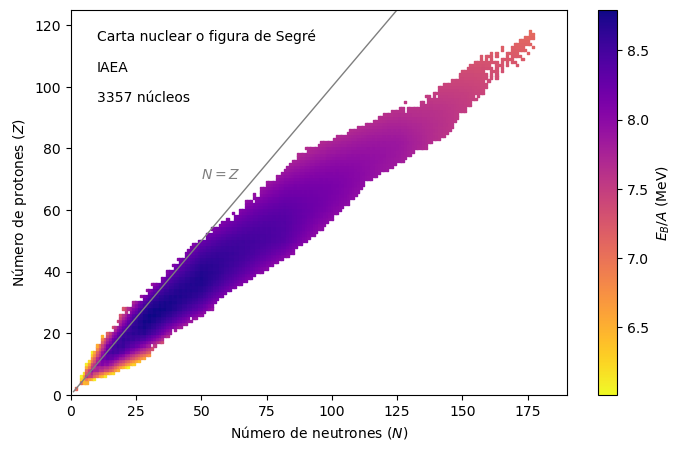

In [4]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,5)) 
ax.set_xlabel(r'Número de neutrones ($N$)')
ax.set_ylabel(r'Número de protones ($Z$)')
dfa1 = df.loc[(df['binding'] >= 6)]
dfa2 = df.loc[(df['binding'] < 6)]
ax.set_xlim((0,190))
ax.set_ylim((0,125))
x = np.linspace(1,125,125)
ax.plot(x,x,'-',lw=1,color=jpac_color[9])
ax.text(10,115,r'Carta nuclear o figura de Segré',c=jpac_color[10],fontsize=10)
ax.text(10,105,r'IAEA',c=jpac_color[10],fontsize=10)
texto = str(df['n'].count()) + ' núcleos'
ax.text(10,95,texto,c=jpac_color[10],fontsize=10)
ax.text(50,70,r'$N=Z$',c=jpac_color[9],fontsize=10)
pa = ax.scatter(dfa1['n'],dfa1['z'],marker='s',s=2.5, c=dfa1['binding'], cmap='plasma_r')
fig.colorbar(pa,ax=ax,orientation='vertical',label=r'$E_B/A$ (MeV)')
plt.show() 

In [10]:
file0 = 'nndc_nudat_data_halflife.csv'
df0 = pd.read_csv(file0,sep=',',header=1)
df0.columns = ('Z', 'N', 'halflife')
df01 = df0.loc[(df0['halflife']=='STABLE')]

df2 = df0[(df0['N']!=df['n']) & (df0['Z']!=df['z']) ]

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,5))
ax.set_xlabel(r'Número de neutrones ($N$)')
ax.set_ylabel(r'Número de protones ($Z$)')
ax.set_xlim((0,190))
ax.set_ylim((0,125))
x = np.linspace(1,125,125)
ax.plot(x,x,'-',lw=1,color=jpac_color[3])
ax.text(55,70,r'$N=Z$',c=jpac_color[3],fontsize=10)

ax.scatter(df['n'],df['z'],marker='s',s=2, c=jpac_color[2],alpha=0.2,zorder=1)
ax.scatter(df0['N'],df0['Z'],marker='s',s=2, c=jpac_color[1],alpha=0.2,zorder=2)

ax.scatter(df2['N'],df2['Z'],marker='s',s=2, c=jpac_color[0],alpha=0.2,zorder=2)


#ax.scatter(df00['n'],df00['z'],marker='s',s=2, c='white',zorder=2)
#ax.scatter(df01['N'],df01['Z'],marker='s',s=2, c=jpac_color[10],zorder=1)
#ax.scatter(df00['n'],df00['z'],marker='s',s=2, c=jpac_color[10],zorder=1)
#ax.scatter(df01['N'],df01['Z'],marker='s',s=2, c='white',zorder=2)
plt.show() 


ValueError: Can only compare identically-labeled Series objects